In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import truncnorm

# Normal distribution within a range

In [2]:


def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

# Initialisation of feature values

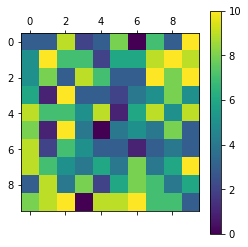

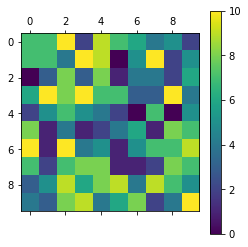

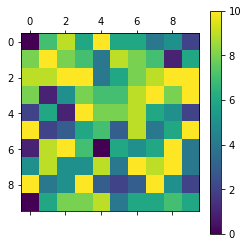

In [3]:
rows = 10
cols = 10
f = 20
q = 10
all_equal = 0
all_unequal = 0
total_relations = ( (rows - 2) * (cols - 2) * 4 ) + ( (rows - 2) * 3 + (rows - 2) * 3 ) + ( (cols - 2) * 3 + (cols - 2) * 3 ) + (4 * 2)  
features = {}
feature_counter_equal = {}
plot1 = np.zeros(shape=(rows,cols))
plot2 = np.zeros(shape=(rows,cols))
plot3 = np.zeros(shape=(rows,cols))
# initialising the feature values
for i in range(rows):
    for j in range(cols):
        List = []
        X = get_truncated_normal(mean = 10, sd = 7, low = 0, upp = q + 1)
        List =  np.floor(X.rvs(f))
        features[(i,j)] = List
for i in range(rows):
    for j in range(cols):
        plot1[i][j] = features[(i,j)][7]
        plot2[i][j] = features[(i,j)][10]
        plot3[i][j] = features[(i,j)][17]
plt.matshow(plot1)
plt.colorbar()
plt.matshow(plot2)
plt.colorbar()
plt.matshow(plot3)
plt.colorbar()

# The count of same features

In [4]:
# keeping the count of same features
for i in range(rows):
    for j in range(cols):
        feature_counter_equal[(i, j)] = {}
        if(i - 1 >= 0):
            if((i - 1 , j) not in feature_counter_equal[(i, j)]):
                feature_counter_equal[(i, j)][(i - 1, j)] = 0
            for k in range(f):
                if(features[(i,j)][k] == features[(i - 1,j)][k]):
                    feature_counter_equal[(i, j)][(i - 1, j)] += 1
        if(i + 1 < rows):
            if((i + 1 , j) not in feature_counter_equal[(i, j)]):
                feature_counter_equal[(i, j)][(i + 1, j)] = 0
            for k in range(f):
                if(features[(i,j)][k] == features[(i + 1,j)][k]):
                    feature_counter_equal[(i, j)][(i + 1, j)] += 1
        if(j - 1 >= 0):
            if((i, j - 1) not in feature_counter_equal[(i, j)]):
                feature_counter_equal[(i, j)][(i, j - 1)] = 0
            for k in range(f):
                if(features[(i,j)][k] == features[(i, j - 1)][k]):
                    feature_counter_equal[(i, j)][(i, j - 1)] += 1
        if(j + 1 < cols):
            if((i, j + 1) not in feature_counter_equal[(i, j)]):
                feature_counter_equal[(i, j)][(i, j + 1)] = 0
            for k in range(f):
                if(features[(i,j)][k] == features[(i, j + 1)][k]):
                    feature_counter_equal[(i, j)][(i, j + 1)] += 1

# Count of all equal and all not equal

In [5]:
all_equal = 0
all_unequal = 0
for i in range(rows):
    for j in range(cols):
        if(i - 1 >= 0):    
            if(feature_counter_equal[(i, j)][(i - 1, j)] == f):
                all_equal += 1
            if(feature_counter_equal[(i, j)][(i - 1, j)] == 0):
                all_unequal += 1
                
        if(i + 1 < rows):    
            if(feature_counter_equal[(i, j)][(i + 1, j)] == f):
                all_equal += 1
            if(feature_counter_equal[(i, j)][(i + 1, j)] == 0):
                all_unequal += 1

        if(j - 1 >= 0):
            if(feature_counter_equal[(i, j)][(i, j - 1)] == f):
                all_equal += 1
            if(feature_counter_equal[(i, j)][(i, j - 1)] == 0):
                all_unequal += 1
        if(j + 1 < cols):
            if(feature_counter_equal[(i, j)][(i, j + 1)] == f):
                all_equal += 1
            if(feature_counter_equal[(i, j)][(i, j + 1)] == 0):
                all_unequal += 1        

# AxelRod's model

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


360
out


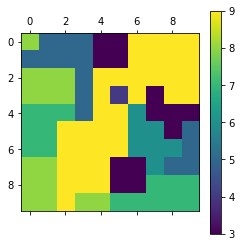

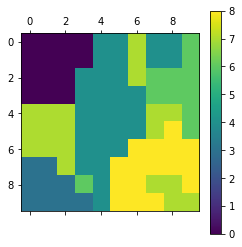

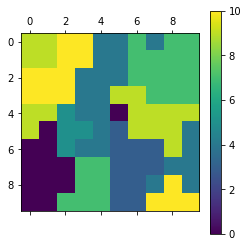

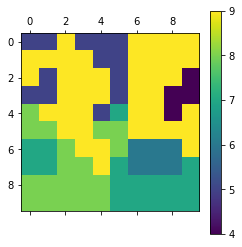

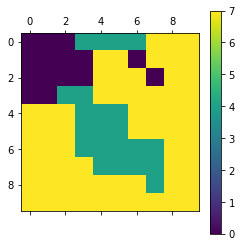

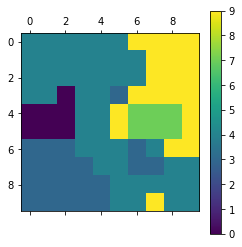

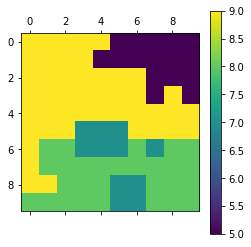

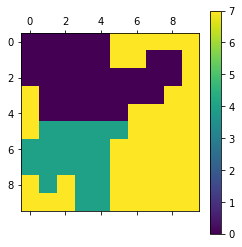

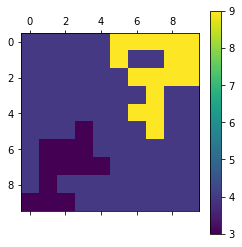

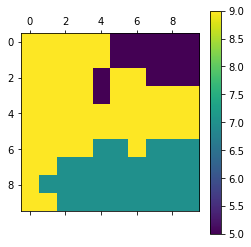

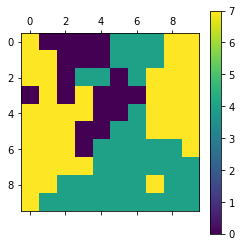

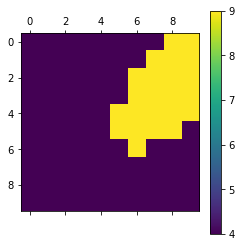

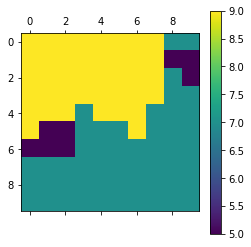

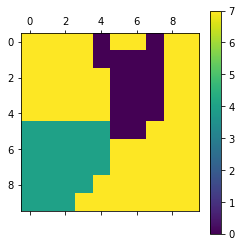

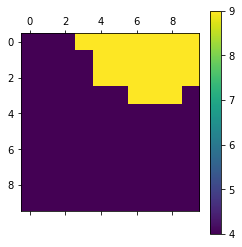

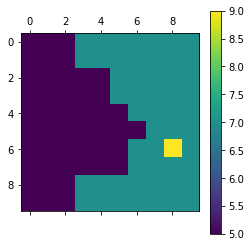

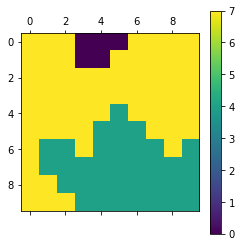

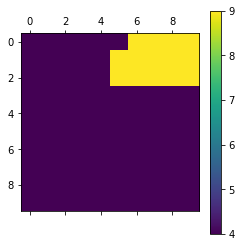

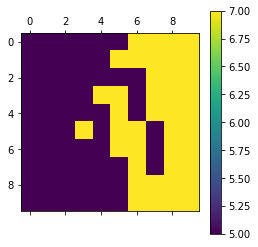

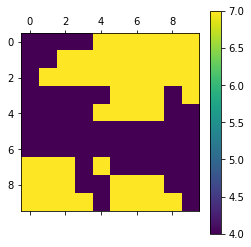

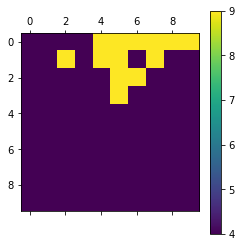

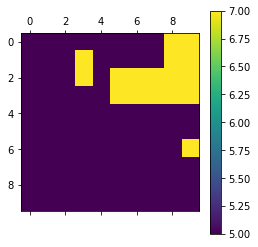

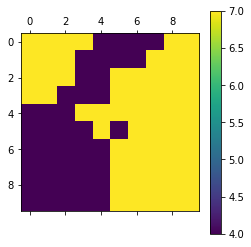

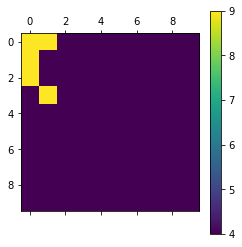

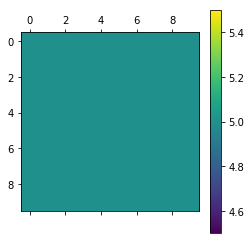

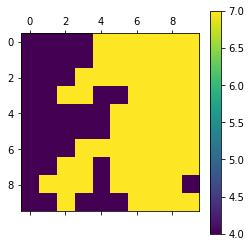

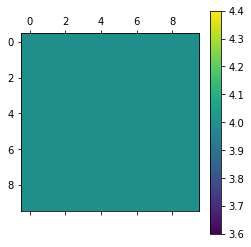

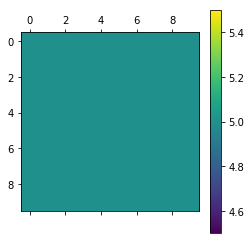

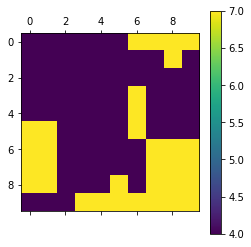

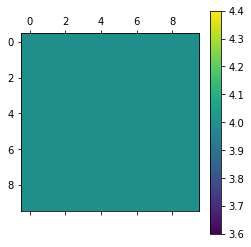

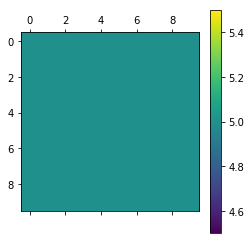

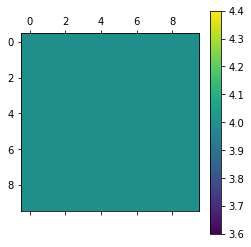

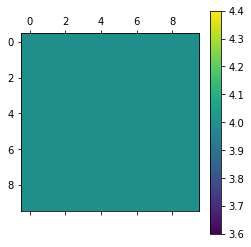

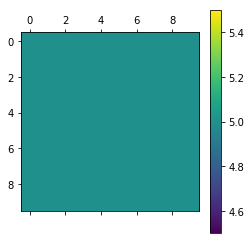

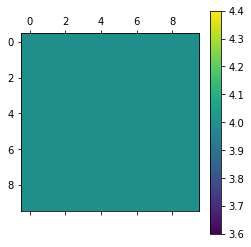

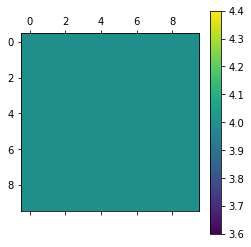

In [6]:
flag = 0
count = 0
iterator = 0 
g= open("data_model.txt","w+")
plot1 = np.zeros(shape=(rows,cols))
plot2 = np.zeros(shape=(rows,cols))
plot3 = np.zeros(shape=(rows,cols))
while True:
    flag = 0
    count += 1
    i = random.randrange(0, rows)
    j = random.randrange(0, cols)
    if iterator == 8580:
        for i in range(rows):
            for j in range(cols):
                plot1[i][j] = features[(i,j)][7]
                plot2[i][j] = features[(i,j)][10]
                plot3[i][j] = features[(i,j)][17]
        
        plt.matshow(plot1)
        plt.colorbar()
        plt.matshow(plot2)
        plt.colorbar()
        plt.matshow(plot3)
        plt.colorbar()
        iterator = 0
    L = []
    if(i - 1 >= 0):    
        L.append((i - 1, j))
    if(i + 1 < rows):    
        L.append((i + 1, j))
    if(j - 1 >= 0):
        L.append((i, j - 1))
    if(j + 1 < cols):
        L.append((i, j + 1))
    index =  random.randrange(0, len(L))   
    neibour = L[index]
    if(feature_counter_equal[(i,j)][neibour] != 0 and feature_counter_equal[(i,j)][neibour] != f):
        prob_cultural_similarity = feature_counter_equal[(i,j)][neibour] / f
        prob = random.uniform(0, 1)
        if prob < prob_cultural_similarity:
            feature = 0
            while True:
                f_1 = random.randrange(0, f)
                if(features[(i,j)][f_1] == features[neibour][f_1]):
                    continue
                else:
                    break

            prev = features[(i,j)][f_1] 
            features[(i,j)][f_1]  = features[neibour][f_1]
            iterator = iterator + 1
            #saving data
            g.write("%s %s %s %s\n" % ((i,j) , prev , neibour , features[(i,j)][f_1]))
            for l in range(len(L)):
                neibour_1 = L[l]
                if(features[neibour_1][f_1] == prev):
                    prev_equal = feature_counter_equal[(i,j)][neibour_1] 
                    feature_counter_equal[(i,j)][neibour_1] -= 1
                    feature_counter_equal[neibour_1][(i,j)] -= 1
                    if(prev_equal == f):
                        all_equal -= 2
                    if(prev_equal == 1):
                        all_unequal += 2
            for l in range(len(L)):
                neibour_1 = L[l]
                if(features[neibour_1][f_1] == features[(i,j)][f_1]):
                    prev_equal = feature_counter_equal[(i,j)][neibour_1] 
                    feature_counter_equal[(i,j)][neibour_1] += 1
                    feature_counter_equal[neibour_1][(i,j)] += 1
                    if(prev_equal == f - 1):
                         all_equal += 2
                    if(prev_equal == 0):
                        all_unequal -= 2
            if(all_equal + all_unequal == total_relations):
                break   

print((all_equal+all_unequal))    
print("out")        

In [7]:
flag = 0
for i in range(rows):
    for j in range(cols):
        if(i - 1 >= 0):    
            if(feature_counter_equal[(i, j)][(i - 1, j)] != f and feature_counter_equal[(i, j)][(i - 1, j)] != 0):
                print("Not reached absorbing state")
                flag = 1
                break
                
        if(i + 1 < rows):    
            if(feature_counter_equal[(i, j)][(i + 1, j)] != f and feature_counter_equal[(i, j)][(i + 1, j)] != 0):
                print("Not reached absorbing state")
                flag = 1
                break
        if(j - 1 >= 0):
            if(feature_counter_equal[(i, j)][(i, j - 1)] != f and feature_counter_equal[(i, j)][(i, j - 1)] != 0):
                print("Not reached absorbing state")
                flag = 1
                break
        if(j + 1 < cols):
            if(feature_counter_equal[(i, j)][(i, j + 1)] != f and feature_counter_equal[(i, j)][(i, j + 1)] != 0):
                print("Not reached absorbing state")
                flag = 1
                break
    if(flag == 1):
        break
if(flag == 0):
    print("Reached absorbing state")                

Reached absorbing state
